# Collect Botometer Scores

In this part, we will use Botometer, an online system for social bot detection, to identify accounts with high likelihood for being a bot account.

Botometer has a [Python API package](https://github.com/IUNetSci/botometer-python) that is very easy to use.

In this part, we will collect Botometer scores for the accounts in our dataset.

In [6]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import json
import gzip
import numpy as np
import pandas as pd
import datetime
from dateutil.parser import parse

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import botometer
from config import TWITTER_KEYS, RAPIDAPI_KEY


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Read tweet datasets to collect user-ids
userProfiles = dict()
with gzip.open('../data/tweets_dehydrated.jsons.gz', 'rb') as fl:
    for line in fl:
        tweet = json.loads(line)
        if tweet['user']['id_str'] not in userProfiles:
            userProfiles[tweet['user']['id_str']] = {'count':0}
            
        userProfiles[tweet['user']['id_str']]['count'] += 1
        userProfiles[tweet['user']['id_str']].update({
            'screen_name': tweet['user']['screen_name'],
            'name': tweet['user']['name'],
            '# of followers': tweet['user']['followers_count'],
            '# of friends': tweet['user']['friends_count'],
            '# of statuses': tweet['user']['statuses_count'],
            'account_creation': tweet['user']['created_at'],
            'account_age': (datetime.datetime.utcnow().date() - parse(tweet['user']['created_at']).date()).days
        })
        
print('{} unique users collected'.format(len(userProfiles)))

67081 unique users collected


In [8]:
# Let's look at the most active accounts

userDf = pd.DataFrame.from_dict(userProfiles, orient='index')
userDf = userDf.sort_values(by='count', ascending=False)
userDf


,count,screen_name,name,# of followers,# of friends,# of statuses,account_creation,account_age
3351542913,1121,ozg197679,🇹🇷 ÖZGÜR 🟢 🇹🇷,15085,13536,61743,Tue Jun 30 10:01:44 +0000 2015,1815
994139570190118912,246,politicscience1,Meltem Yılmaz ⚡,31136,15211,23673,Wed May 09 08:58:38 +0000 2018,771
848265514833072128,242,rte_edri,LÂ EDRÎ 🟢🇹🇷 #MilliHesap,37536,26243,20960,Sat Apr 01 20:07:13 +0000 2017,1174
2975033182,231,Hilal63M,𝓤𝓛𝓤𝓑𝓐𝓣𝓛𝓘 𝓐𝓩𝓐𝓟 🟢🇹🇷🇹🇷🇹🇷,2024,5002,5138,Mon Jan 12 17:26:32 +0000 2015,1984
1240327132091420672,222,ak_genc_,ak_genc_torunlari 🟢 🇹🇷 #MilliHesaplarBurada,2437,1472,2880,Wed Mar 18 17:20:18 +0000 2020,92
4483210042,222,rterdoganfans,Erdoğan Sevenleri 🟢🇹🇷,17820,5839,914,Mon Dec 14 17:04:51 +0000 2015,1648
1154271476499066886,212,SamedTekstil,Samed tekstil 🟢 🇹🇷,1702,1831,2104,Thu Jul 25 06:05:40 +0000 2019,329
853709110751240193,212,Neslihandmr01,NeslihanDmr,5731,3856,4959,Sun Apr 16 20:38:07 +0000 2017,1159
910762418,209,aras_gul,Gül ARAS ÇINAR 🟢🇹🇷,5763,4178,4546,Sun Oct 28 17:37:09 +0000 2012,2790
698427800265609216,199,AkyasanSinan,Sinan Akyasan 🇹🇷🟢TAKİP ET 🟢🇹🇷,4451,4651,1971,Sat Feb 13 08:45:38 +0000 2016,1587


Text(0, 0.5, 'Histogram')

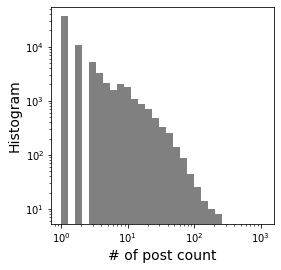

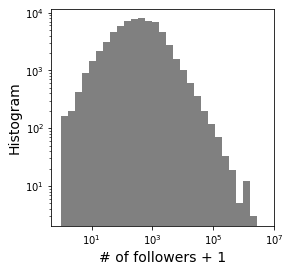

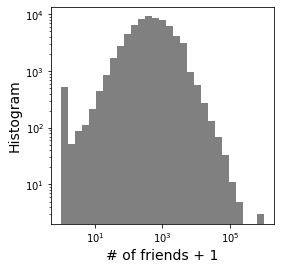

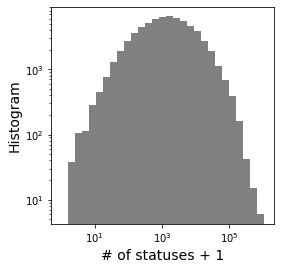

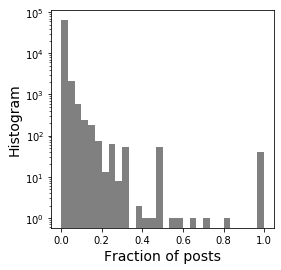

In [13]:
fig = plt.figure(figsize=(4,4))
logbins = np.logspace(np.log10(min(userDf['count'])), 
                      np.log10(max(userDf['count'])), 30)
plt.hist(userDf['count'], log=True, bins=logbins, color='0.5')
plt.xscale('log')
plt.xlabel('# of post count', fontsize=14)
plt.ylabel('Histogram', fontsize=14)

fig = plt.figure(figsize=(4,4))
logbins = np.logspace(0, np.log10(max(userDf['# of followers'])), 30)
plt.hist(userDf['# of followers']+1, log=True, bins=logbins, color='0.5')
plt.xscale('log')
plt.xlabel('# of followers + 1', fontsize=14)
plt.ylabel('Histogram', fontsize=14)

fig = plt.figure(figsize=(4,4))
logbins = np.logspace(0, np.log10(max(userDf['# of friends'])), 30)
plt.hist(userDf['# of friends']+1, log=True, bins=logbins, color='0.5')
plt.xscale('log')
plt.xlabel('# of friends + 1', fontsize=14)
plt.ylabel('Histogram', fontsize=14)

fig = plt.figure(figsize=(4,4))
logbins = np.logspace(0, np.log10(max(userDf['# of statuses'])), 30)
plt.hist(userDf['# of statuses']+1, log=True, bins=logbins, color='0.5')
plt.xscale('log')
plt.xlabel('# of statuses + 1', fontsize=14)
plt.ylabel('Histogram', fontsize=14)


fig = plt.figure(figsize=(4,4))
plt.hist(userDf['count']/userDf['# of statuses'], bins=30, color='0.5')
plt.yscale('log')
plt.xlabel('Fraction of posts', fontsize=14)
plt.ylabel('Histogram', fontsize=14)



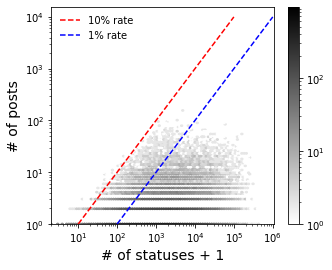

In [10]:

fig = plt.figure(figsize=(5,4))
plt.hexbin(userDf['# of statuses']+1, userDf['count'], 
           xscale='log', yscale='log', bins=500, cmap='binary',
           norm=matplotlib.colors.LogNorm())
yvals = np.logspace(0,4,10)
plt.plot(yvals*10, yvals, 'r--', label='10% rate')
plt.plot(yvals*100, yvals, 'b--', label='1% rate')
plt.xlabel('# of statuses + 1', fontsize=14)
plt.ylabel('# of posts', fontsize=14)
plt.legend(loc='upper left', frameon=False)
plt.colorbar()


## Setup Botometer API

In [7]:
# Let's test the API endpoint

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=RAPIDAPI_KEY,
                          **TWITTER_KEYS)

result = bom.check_account('@onurvarol')
print(json.dumps(result, sort_keys=True, indent=2))


{
  "cap": {
    "english": 0.009922300094567935,
    "universal": 0.010164988287386762
  },
  "categories": {
    "content": 0.22257131799190547,
    "friend": 0.2573671414176634,
    "network": 0.10416612598937423,
    "sentiment": 0.4608187718427546,
    "temporal": 0.11098691236375971,
    "user": 0.05042452964186063
  },
  "display_scores": {
    "content": 1.1,
    "english": 0.9,
    "friend": 1.3,
    "network": 0.5,
    "sentiment": 2.3,
    "temporal": 0.6,
    "universal": 0.9,
    "user": 0.3
  },
  "scores": {
    "english": 0.1807672693005155,
    "universal": 0.1701324265302999
  },
  "user": {
    "id_str": "77436536",
    "screen_name": "onurvarol"
  }
}


In [11]:
# Collect Botometer scores
# This collection takes a while and Free-tier Botometer API has rate-limits.

BOTOMETER_SCORE_FILE = '../data/botometer_scores.jsons.gz'
BOTOMETER_ERROR_FILE = '../data/botometer_scores.errors'

## Collect already existing scores from previous runs
botometerScores = dict()
try:
    with gzip.open(BOTOMETER_SCORE_FILE, 'r') as fl:
        for line in fl:
            try:
                temp = json.loads(line)
                botometerScores[temp['user']['id_str']] = temp
            except:
                pass
except Exception as e:
    print(e)
print('Scores for {} accounts already collected'.format(len(botometerScores)))


## Collect IDs of the accounts that are either deleted or suspended
removedAccounts = set()
try:
    with open(BOTOMETER_ERROR_FILE, 'r') as fl:
        for line in fl:
            removedAccounts.add(line.strip())
except Exception as e:
    print(e)
print('{} accounts unaccessible'.format(len(removedAccounts)))


## Collect Botometer scores for the remaning accounts
userList = list(userDf.index)
toCollect = set(userList) - (set(botometerScores.keys()) | removedAccounts)
print('{}/{} accounts will be collected'.format(len(toCollect), len(userList)))


'''
for c,uid in enumerate(userList):
    if uid not in toCollect:
        continue
    try:
        result = bom.check_account(uid)
        
        with open(BOTOMETER_SCORE_FILE, 'a') as fl:
            fl.write('{}\n'.format(json.dumps(result)))
        
    except Exception as e:
        msg = str(e)
        print('[ERROR]: {}'.format(msg))
    
    if (c % 100) == 0:
        print(c, 'accounts processed so far')
'''

print('''NOTE: IPython Kernels can be unstable, 
      I exported this part of the code into a 
      Python script and run from console''')

Scores for 65887 accounts already collected
1228 accounts unaccessible
10/67081 accounts will be collected
NOTE: IPython Kernels can be unstable, 
      I exported this part of the code into a 
      Python script and run from console


In [12]:
botScores = dict()
with gzip.open(BOTOMETER_SCORE_FILE, 'r') as fl:
    for line in fl:
        try:
            temp = json.loads(line)
            botScores[temp['user']['id_str']] = temp
        except:
            pass
print(len(botScores), 'Botometer scores collected')

65887 Botometer scores collected


/Users/onurvarol/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/onurvarol/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


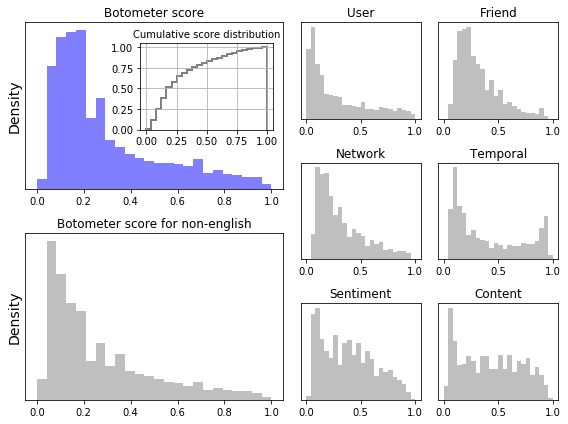

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(8,6))
spec = gridspec.GridSpec(ncols=8, nrows=6, figure=fig)
ax1 = fig.add_subplot(spec[4:6, 6:])
ax1.set_title('Content')
ax1.hist([s['categories']['content'] for u,s in botScores.items()], 
         bins=np.linspace(0,1,25), color='0.5', alpha=0.5)
ax1.set_yticks([])

ax2 = fig.add_subplot(spec[2:4, 6:])
ax2.set_title('Temporal')
ax2.hist([s['categories']['temporal'] for u,s in botScores.items()], 
         bins=np.linspace(0,1,25), color='0.5', alpha=0.5)
ax2.set_yticks([])

ax3 = fig.add_subplot(spec[:2, 6:])
ax3.set_title('Friend')
ax3.hist([s['categories']['friend'] for u,s in botScores.items()], 
         bins=np.linspace(0,1,25), color='0.5', alpha=0.5)
ax3.set_yticks([])

ax4 = fig.add_subplot(spec[4:6, 4:6])
ax4.set_title('Sentiment')
ax4.hist([s['categories']['sentiment'] for u,s in botScores.items()], 
         bins=np.linspace(0,1,25), color='0.5', alpha=0.5)
ax4.set_yticks([])

ax5 = fig.add_subplot(spec[2:4, 4:6])
ax5.set_title('Network')
ax5.hist([s['categories']['network'] for u,s in botScores.items()], 
         bins=np.linspace(0,1,25), color='0.5', alpha=0.5)
ax5.set_yticks([])

ax6 = fig.add_subplot(spec[:2, 4:6])
ax6.set_title('User')
ax6.hist([s['categories']['user'] for u,s in botScores.items()], 
         bins=np.linspace(0,1,25), color='0.5', alpha=0.5)
ax6.set_yticks([])

axM1 = fig.add_subplot(spec[:3, :4])
axM1.set_title('Botometer score')
axM1.hist([s['scores']['english'] for u,s in botScores.items()], 
          bins=np.linspace(0,1,25), color='b', alpha=0.5)
axM1.set_yticks([])
axM1.set_ylabel('Density', fontsize=14)

axM2 = fig.add_subplot(spec[3:6, :4])
axM2.set_title('Botometer score for non-english')
axM2.hist([s['scores']['universal'] for u,s in botScores.items()], 
          bins=np.linspace(0,1,25), color='0.5', alpha=0.5)
axM2.set_yticks([])
axM2.set_ylabel('Density', fontsize=14)

axInset = fig.add_axes([0.25,0.69, 0.23, 0.2])
axInset.hist([s['scores']['english'] for u,s in botScores.items()], cumulative=True, density=True,
             bins=np.linspace(0,1,25), color='0.5', histtype='step', linewidth=2)
axInset.set_title('Cumulative score distribution', fontsize=10)
axInset.set_xticks([0,0.25,0.5,0.75,1])
axInset.set_yticks([0,0.25,0.5,0.75,1])
axInset.grid()

plt.tight_layout()
plt.savefig('../figures/demo-botometer-distribution.pdf', bbox_inches = "tight", transparent=True, dpi=300)


(65887, 6)


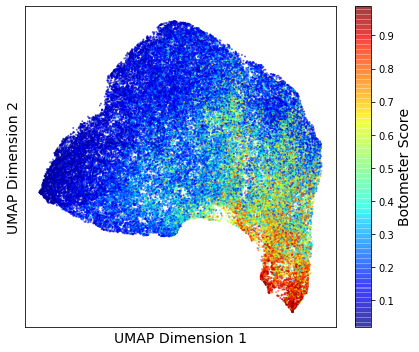

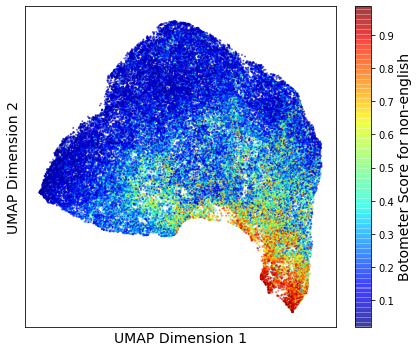

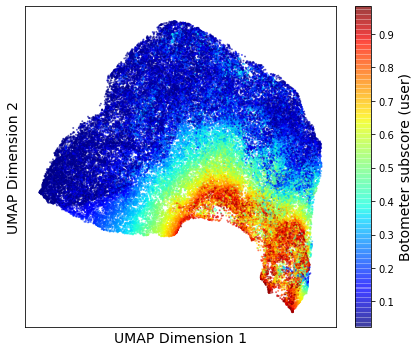

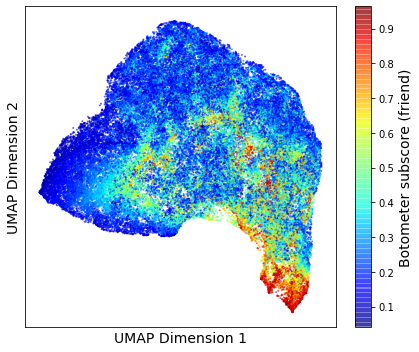

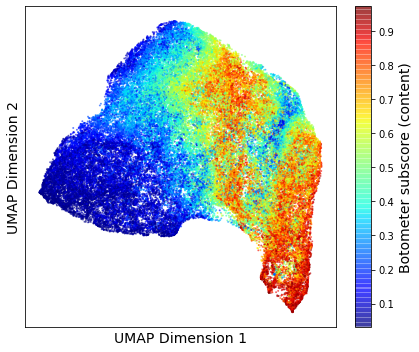

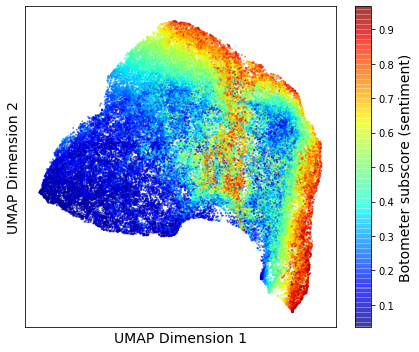

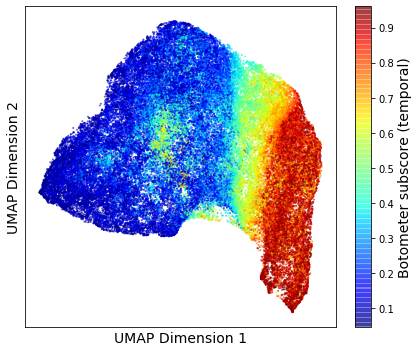

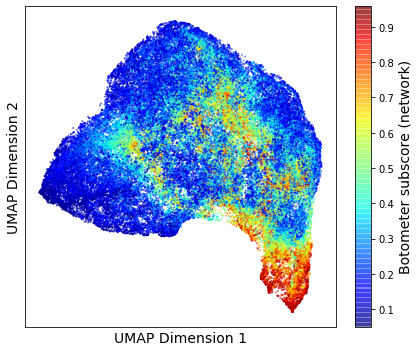

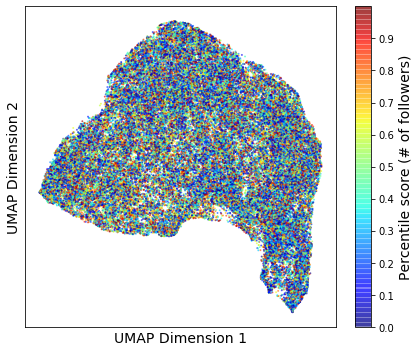

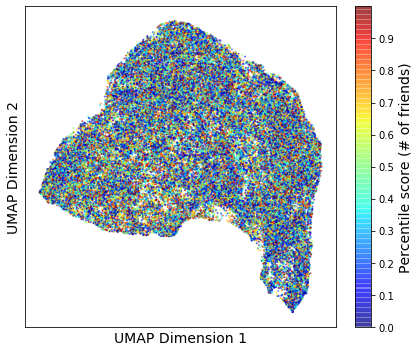

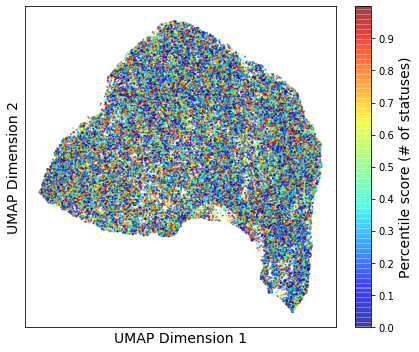

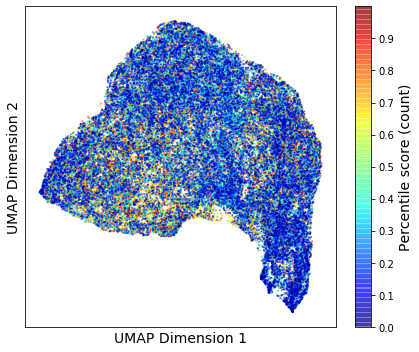

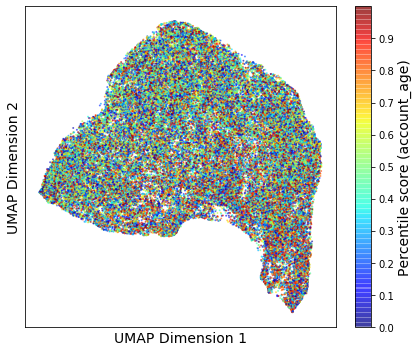

In [15]:
# Create UMAP embedding based on sub-scores and colour them based on overall score

import umap

def plot_umap_embeddings(coord2d, colors, cbarlbl=None, savefig=None):
    fig = plt.figure(figsize=(6,5))
    plt.scatter(coord2d[:,0], coord2d[:,1], c=colors, s=1, alpha=0.5, cmap='jet')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('UMAP Dimension 1', fontsize=14)
    plt.ylabel('UMAP Dimension 2', fontsize=14)
    cbar = plt.colorbar()
    cbar.set_ticks(np.linspace(0,1,11))
    if cbarlbl != None:
        cbar.set_label(cbarlbl, fontsize=14)
    plt.tight_layout()
    
    if savefig != None:
        plt.savefig(savefig, bbox_inches = "tight", transparent=True, dpi=300)

#'''
userIds = list(botScores.keys())
scoreM = list()
for u in userIds:x
    s = botScores[u]
    scoreM.append([s['categories'][c] for c in sorted(s['categories'].keys())])
scoreM = np.array(scoreM)
print(scoreM.shape)
    
umdl = umap.UMAP(random_state=42)
coord2d = umdl.fit_transform(scoreM)
#'''


plot_umap_embeddings(coord2d, colors=[botScores[u]['scores']['english'] for u in userIds], 
                     cbarlbl='Botometer Score', savefig='../figures/demo_botometer-embedding.pdf')

plot_umap_embeddings(coord2d, colors=[botScores[u]['scores']['universal'] for u in userIds], 
                     cbarlbl='Botometer Score for non-english')


for sub in ['user', 'friend', 'content', 'sentiment', 'temporal', 'network']:
    plot_umap_embeddings(coord2d, colors=[botScores[u]['categories'][sub] for u in userIds], 
                     cbarlbl='Botometer subscore ({})'.format(sub))


for prop in ['# of followers', '# of friends', '# of statuses', 'count', 'account_age']:
    propVal = [userProfiles[u][prop] for u in userIds]
    percentile = np.argsort(propVal) / len(propVal)
    
    plot_umap_embeddings(coord2d, colors=percentile, 
                     cbarlbl='Percentile score ({})'.format(prop))
    